# Regularization

In this lab, we will see the impact of different regularization techniques on decision boundaries, seeing how they can be used to avoid overfitting.

Import all necessary libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

We will build two non-linearly separable datasets for classification.

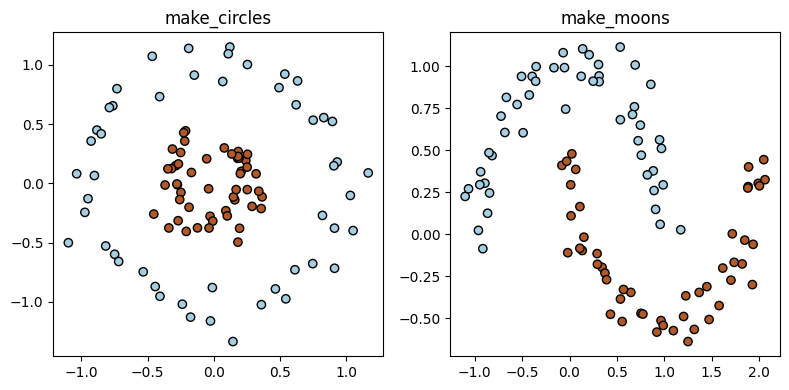

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

X_circles, Y_circles = make_circles(noise=0.1, factor=0.3, random_state=0)
ax1.scatter(X_circles[:, 0], X_circles[:, 1], c=Y_circles, cmap=plt.cm.Paired, edgecolor='k')
ax1.set_title("make_circles")

X_moons, Y_moons = make_moons(noise=0.1, random_state=0)
ax2.scatter(X_moons[:, 0], X_moons[:, 1], c=Y_moons, cmap=plt.cm.Paired, edgecolor='k')
ax2.set_title("make_moons")



plt.tight_layout()
plt.show()

Scale data and split each dataset into training and test.



In [4]:
# Preprocess datasets: scaling
scaler = StandardScaler()
X_circles = scaler.fit_transform(X_circles)
X_moons = scaler.fit_transform(X_moons)

# Split into train and test sets
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_circles, Y_circles, test_size=0.2, random_state=0)
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_moons, Y_moons, test_size=0.2, random_state=0)


Train two neural networks, one for each dataset, for label classification.

Suggested architecture:
* Both networks should have a sigmoid activation function in their output layer, as it is a binary classification.
* You can use binary_crossentropy loss, since we are performing binary classification with labels.
* The model to classify circles will most likely be more complex than the one to classify moons, since the decision boundary is more complex.
*For circles, an example can be three hidden layers with 32, 64, and 32 neurons each, all with ReLu.
*For moons, an example can be three hidden layers with 16 neurons each, all with ReLu.
*You can use Adam as an optimizer with 0.01 learning rate.

Plot the accuracy and loss over the epochs. Try to reach a very high accuracy on the training set.

In [5]:
# Circles model

# Input layer
input_circles = Input(shape=(2,))

# Hidden layers
x = Dense(32, activation='relu')(input_circles)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output layer
output_circles = Dense(1, activation='sigmoid')(x)

# Model
model_circles = Model(inputs=input_circles, outputs=output_circles)

# Compile
model_circles.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


# Moons model

# Input layer
input_moons = Input(shape=(2,))

# Hidden layers
x = Dense(16, activation='relu')(input_moons)
x = Dense(16, activation='relu')(x)
x = Dense(16, activation='relu')(x)

# Output layer
output_moons = Dense(1, activation='sigmoid')(x)

# Model
model_moons = Model(inputs=input_moons, outputs=output_moons)

# Compile
model_moons.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


2024-11-18 18:34:45.418238: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Train circles model
history_circles = model_circles.fit(X_train_c, Y_train_c, validation_data=(X_test_c, Y_test_c), epochs=100, batch_size=32, verbose=1)

# Train moons model
history_moons = model_moons.fit(X_train_m, Y_train_m, validation_data=(X_test_m, Y_test_m), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4437 - loss: 0.6692 - val_accuracy: 0.4500 - val_loss: 0.6083
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4711 - loss: 0.5773 - val_accuracy: 0.4500 - val_loss: 0.5489
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5266 - loss: 0.4853 - val_accuracy: 0.6000 - val_loss: 0.4679
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7375 - loss: 0.4320 - val_accuracy: 0.9500 - val_loss: 0.4000
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9117 - loss: 0.3589 - val_accuracy: 1.0000 - val_loss: 0.3398
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9898 - loss: 0.2987 - val_accuracy: 1.0000 - val_loss: 0.2917
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.2370 - val_accuracy: 1.0000 - val_loss: 0.2435
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.2195 - val_accuracy: 1.0000 - val_loss:

To visualize the decision boundaries of your classifiers, you can use a dense grid of points over the feature space, classify each point using the trained models, and then plot the resulting classifications as a contour map.

12779/12779 ━━━━━━━━━━━━━━━━━━━━ 8s 610us/step


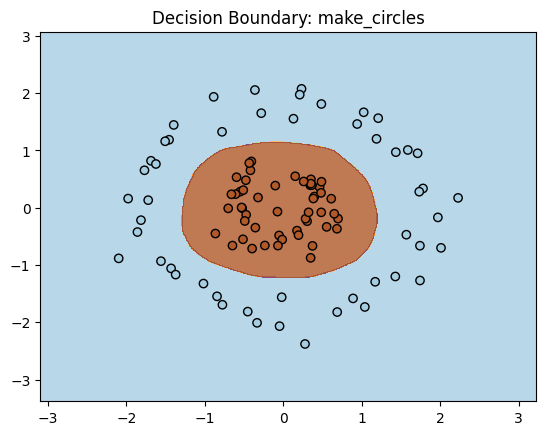

9676/9676 ━━━━━━━━━━━━━━━━━━━━ 6s 598us/step


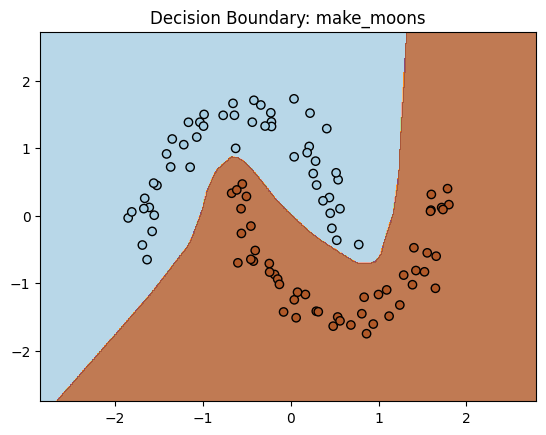

In [7]:
# Decision boundary visualization function
def plot_decision_boundary(X, Y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid).reshape(xx.shape)
    predictions = (predictions > 0.5).astype(int)  # Binary classification threshold
    plt.contourf(xx, yy, predictions, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# Example: Plot decision boundaries for make_circles
plot_decision_boundary(X_circles, Y_circles, model_circles, "Decision Boundary: make_circles")

# Example: Plot decision boundaries for make_moons
plot_decision_boundary(X_moons, Y_moons, model_moons, "Decision Boundary: make_moons")

Now, apply L1 regularization to your models. In keras, you can add kernel_regularizer=l1(*parameter*) when you define a layer in your model, to add regularization on that layer. Try adding it to some or all layers, and visualise the new decision boundary.

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.5000 - loss: 5.8626 - val_accuracy: 0.4375 - val_loss: 5.2356
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.4688 - loss: 5.1035 - val_accuracy: 0.4375 - val_loss: 4.5358
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5104 - loss: 4.4100 - val_accuracy: 0.4375 - val_loss: 3.9122
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5833 - loss: 3.7908 - val_accuracy: 0.5000 - val_loss: 3.3581
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6250 - loss: 3.2532 - val_accuracy: 0.5625 - val_loss: 2.8752
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7188 - loss: 2.7792 - val_accuracy: 0.6875 - val_loss: 2.4548
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8125 - loss: 2.3674 - val_accuracy: 0.6250 - val_loss: 2.0930
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7917 - loss: 2.0113 - val_accuracy: 0.6250 - val_los

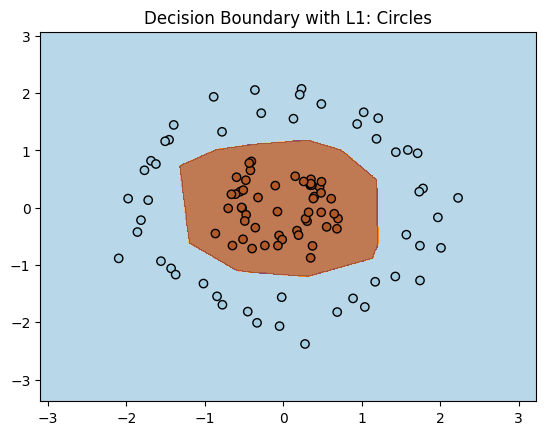

9676/9676 ━━━━━━━━━━━━━━━━━━━━ 6s 649us/step


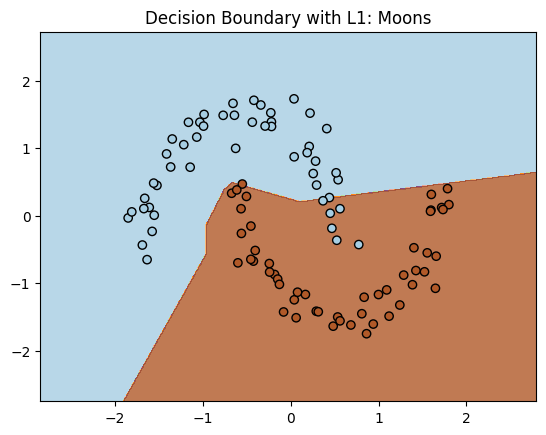

In [8]:
from tensorflow.keras.regularizers import l1

# Input layer
input_circles = Input(shape=(2,))

# Hidden layers with L1 regularization
x = Dense(32, activation='relu', kernel_regularizer=l1(0.01))(input_circles)
x = Dense(64, activation='relu', kernel_regularizer=l1(0.01))(x)
x = Dense(32, activation='relu', kernel_regularizer=l1(0.01))(x)

# Output layer
output_circles = Dense(1, activation='sigmoid')(x)

# Model
model_circles_l1 = Model(inputs=input_circles, outputs=output_circles)

# Compile
model_circles_l1.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


# Input layer
input_moons = Input(shape=(2,))

# Hidden layers with L1 regularization
x = Dense(16, activation='relu', kernel_regularizer=l1(0.01))(input_moons)
x = Dense(16, activation='relu', kernel_regularizer=l1(0.01))(x)
x = Dense(16, activation='relu', kernel_regularizer=l1(0.01))(x)

# Output layer
output_moons = Dense(1, activation='sigmoid')(x)

# Model
model_moons_l1 = Model(inputs=input_moons, outputs=output_moons)

# Compile
model_moons_l1.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


history_circles_l1 = model_circles_l1.fit(X_train_c, Y_train_c, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
history_moons_l1 = model_moons_l1.fit(X_train_m, Y_train_m, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


plot_decision_boundary(X_circles, Y_circles, model_circles_l1, "Decision Boundary with L1: Circles")
plot_decision_boundary(X_moons, Y_moons, model_moons_l1, "Decision Boundary with L1: Moons")


Now, do the same with L2 regularization. In keras, you can add kernel_regularizer=l2(*parameter*).

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.4271 - loss: 1.5576 - val_accuracy: 0.4375 - val_loss: 1.4064
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 1.3473 - val_accuracy: 0.4375 - val_loss: 1.2540
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4896 - loss: 1.1753 - val_accuracy: 0.4375 - val_loss: 1.1273
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5521 - loss: 1.0141 - val_accuracy: 0.4375 - val_loss: 1.0237
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6042 - loss: 0.9060 - val_accuracy: 0.5000 - val_loss: 0.9131
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7188 - loss: 0.7979 - val_accuracy: 0.6250 - val_loss: 0.8056
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8438 - loss: 0.6895 - val_accuracy: 0.8125 - val_loss: 0.7118
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8646 - loss: 0.6085 - val_accuracy: 0.8750 - val_loss

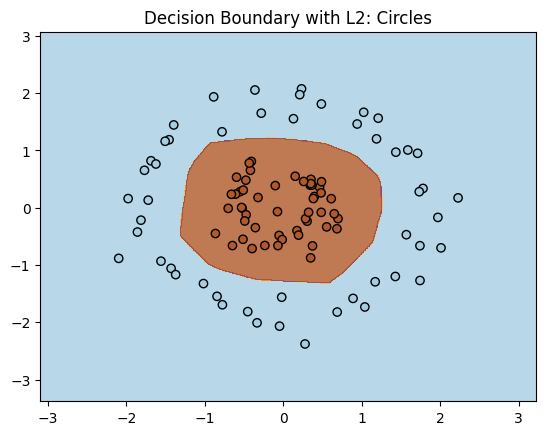

9676/9676 ━━━━━━━━━━━━━━━━━━━━ 6s 633us/step


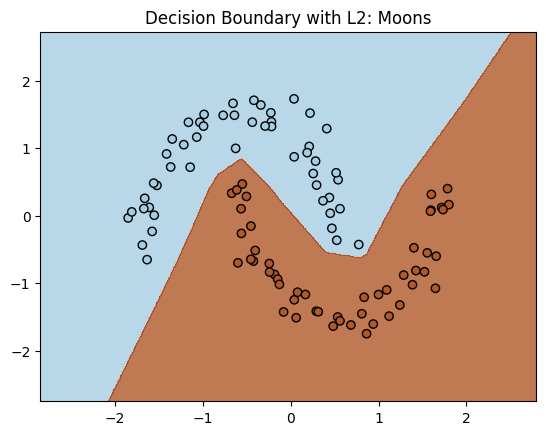

In [9]:
from tensorflow.keras.regularizers import l2

# Input layer
input_circles = Input(shape=(2,))

# Hidden layers with L2 regularization
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(input_circles)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)

# Output layer
output_circles = Dense(1, activation='sigmoid')(x)

# Model
model_circles_l2 = Model(inputs=input_circles, outputs=output_circles)

# Compile
model_circles_l2.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


# Input layer
input_moons = Input(shape=(2,))

# Hidden layers with L2 regularization
x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(input_moons)
x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(x)

# Output layer
output_moons = Dense(1, activation='sigmoid')(x)

# Model
model_moons_l2 = Model(inputs=input_moons, outputs=output_moons)

# Compile
model_moons_l2.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])



history_circles_l2 = model_circles_l2.fit(X_train_c, Y_train_c, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
history_moons_l2 = model_moons_l2.fit(X_train_m, Y_train_m, epochs=100, batch_size=32, validation_split=0.2, verbose=1)



plot_decision_boundary(X_circles, Y_circles, model_circles_l2, "Decision Boundary with L2: Circles")
plot_decision_boundary(X_moons, Y_moons, model_moons_l2, "Decision Boundary with L2: Moons")

OPTIONAL: Combine the two datasets into one. Train a network to perform the new classification task with a very complex decision boundary. Experiment with regularization to prevent overfitting.

In [10]:
# Add dataset-specific labels
Y_circles_new = Y_circles * 0  # Label 0 for circles
Y_moons_new = Y_moons * 1      # Label 1 for moons

# Combine the datasets
X_combined = np.vstack((X_circles, X_moons))
Y_combined = np.hstack((Y_circles_new, Y_moons_new))

# Shuffle the combined dataset
from sklearn.utils import shuffle
X_combined, Y_combined = shuffle(X_combined, Y_combined, random_state=42)

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y_combined, test_size=0.2, random_state=42)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7573 - loss: 22.7119 - val_accuracy: 0.6875 - val_loss: 21.8275
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7719 - loss: 21.5707 - val_accuracy: 0.6875 - val_loss: 20.7246
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7458 - loss: 20.4787 - val_accuracy: 0.6875 - val_loss: 19.6572
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7510 - loss: 19.4143 - val_accuracy: 0.6875 - val_loss: 18.6235
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7458 - loss: 18.3881 - val_accuracy: 0.6875 - val_loss: 17.6205
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7208 - loss: 17.3953 - val_accuracy: 0.6875 - val_loss: 16.6524
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7708 - loss: 16.4246 - val_accuracy: 0.6875 - val_loss: 15.7155
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7292 - loss: 15.5027 - val_accuracy: 0.687

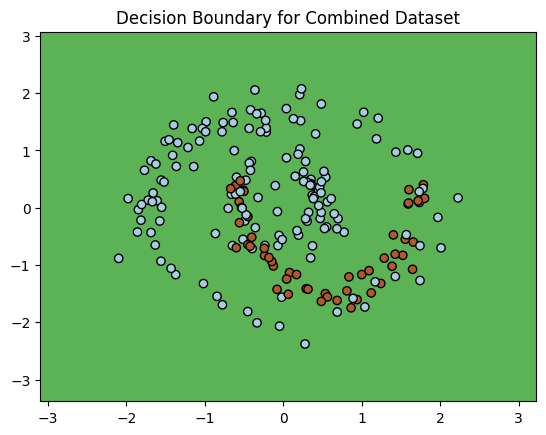

In [11]:
from tensorflow.keras.regularizers import l1_l2

# Input layer
input_combined = Input(shape=(2,))

# Hidden layers with L1 and L2 regularization
x = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(input_combined)
x = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
x = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)

# Output layer
output_combined = Dense(1, activation='sigmoid')(x)

# Model
model_combined = Model(inputs=input_combined, outputs=output_combined)

# Compile
model_combined.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_combined = model_combined.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1
)


# Function to visualize decision boundaries
plot_decision_boundary(X_combined, Y_combined, model_combined, "Decision Boundary for Combined Dataset")